In [30]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
df = pd.read_csv('medical_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# cheaking the shape of the data
print('Columns:',df.shape[1])
print('Rows:',df.shape[0])

Columns: 14
Rows: 110527


### no_show is our target(dependent) avriable rest of all is our dependent variable

In [4]:
# cheaking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## # the patient_id, appontment_id is not useful for our prediction so need to drop them

In [5]:
df.drop(['PatientId','AppointmentID'],axis = 1,inplace = True)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [6]:
# cheaking row wise null value
df.isnull().sum(axis=1)[df.isnull().sum(axis=1) > 10]  

Series([], dtype: int64)

In [7]:
# cheaking null values in the data
df.isnull().sum()/df.shape[0]*100

Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

##### There is no any null value in this data.

In [8]:
# cheaking the duplicates
df[df.duplicated()].head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
154,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No


##### in this data set there is no any duplicate data

# EDA

## # outlier cheaking

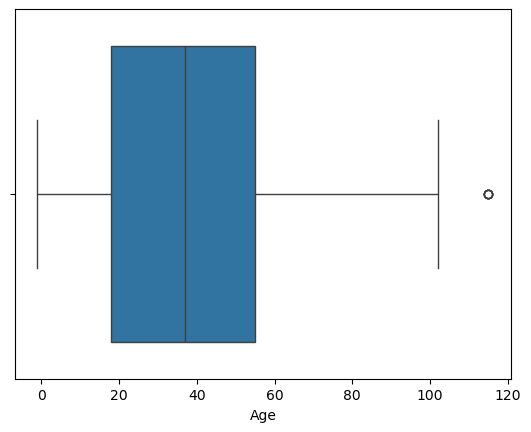

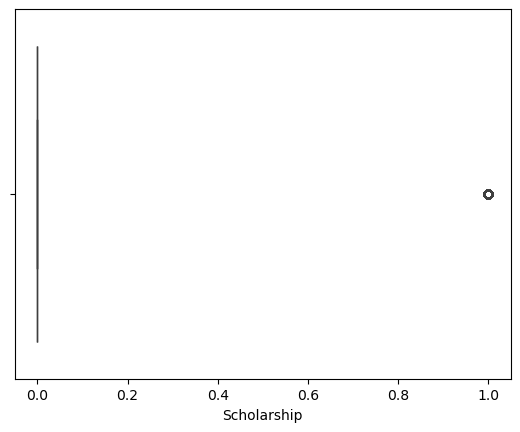

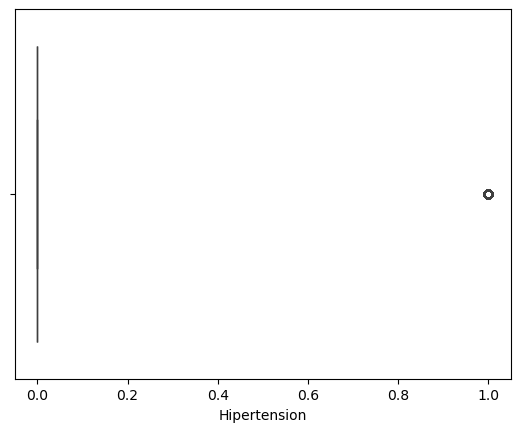

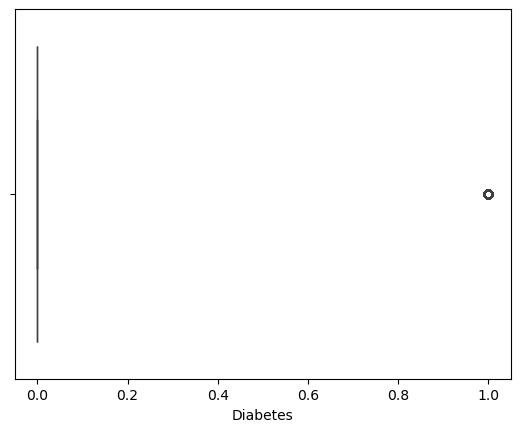

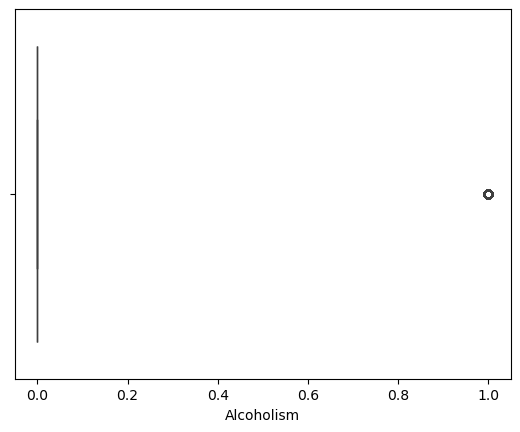

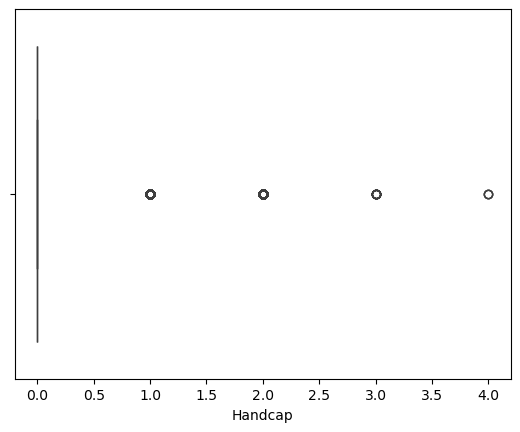

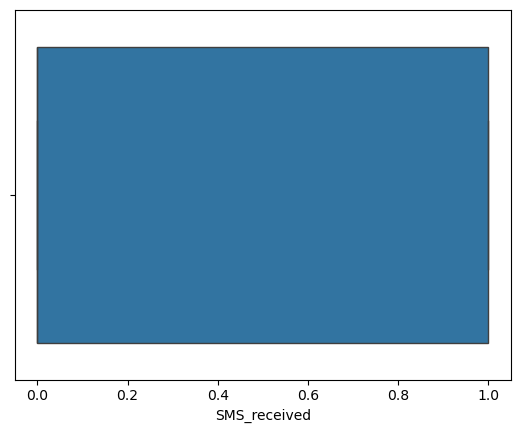

In [9]:
for i in df.select_dtypes(include = np.number).columns:
    sns.boxplot(x=df[i])
    plt.show()

* patient id and appointment id is genarated by computer that is not significant for our model.(going to remove)
* age column has outlier the minimum age of patient is -1 that is not possible and the maximum age is 115 that can be possible  
  (going to remove that row where the age is -1)

## # cheaking the skewness and kurtosis

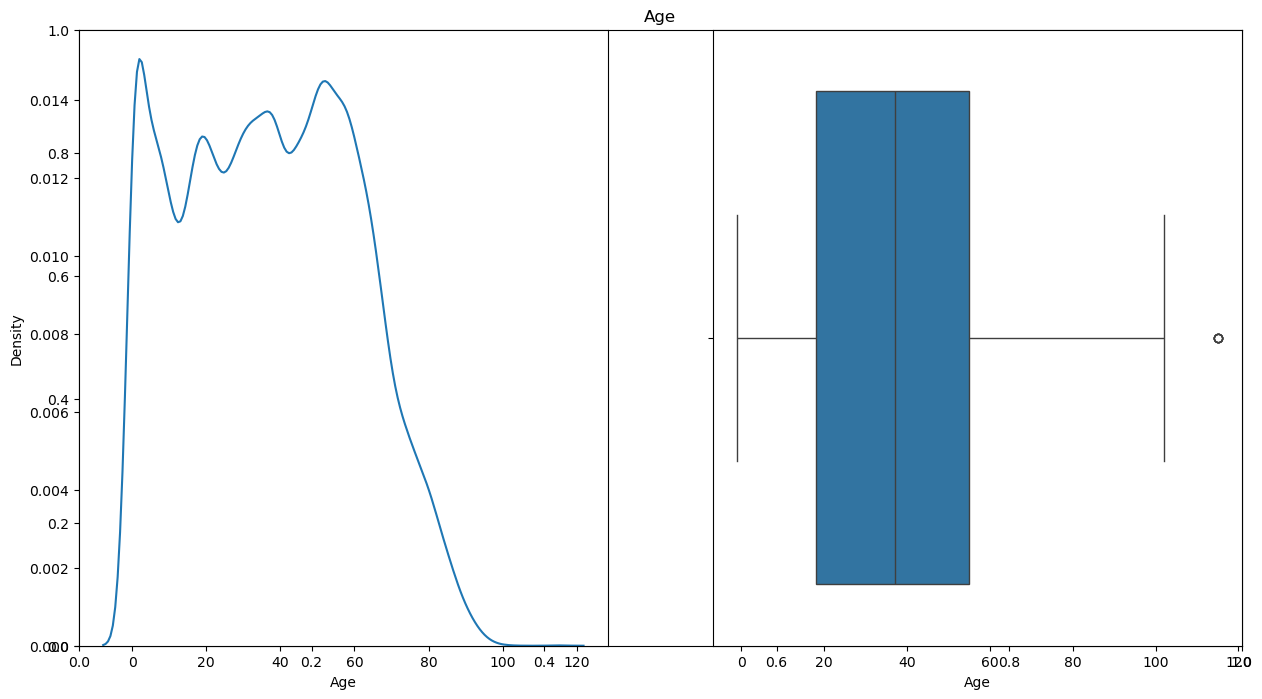

Skewness: 0.12165801789597985
Kurtosis: -0.952267394656098


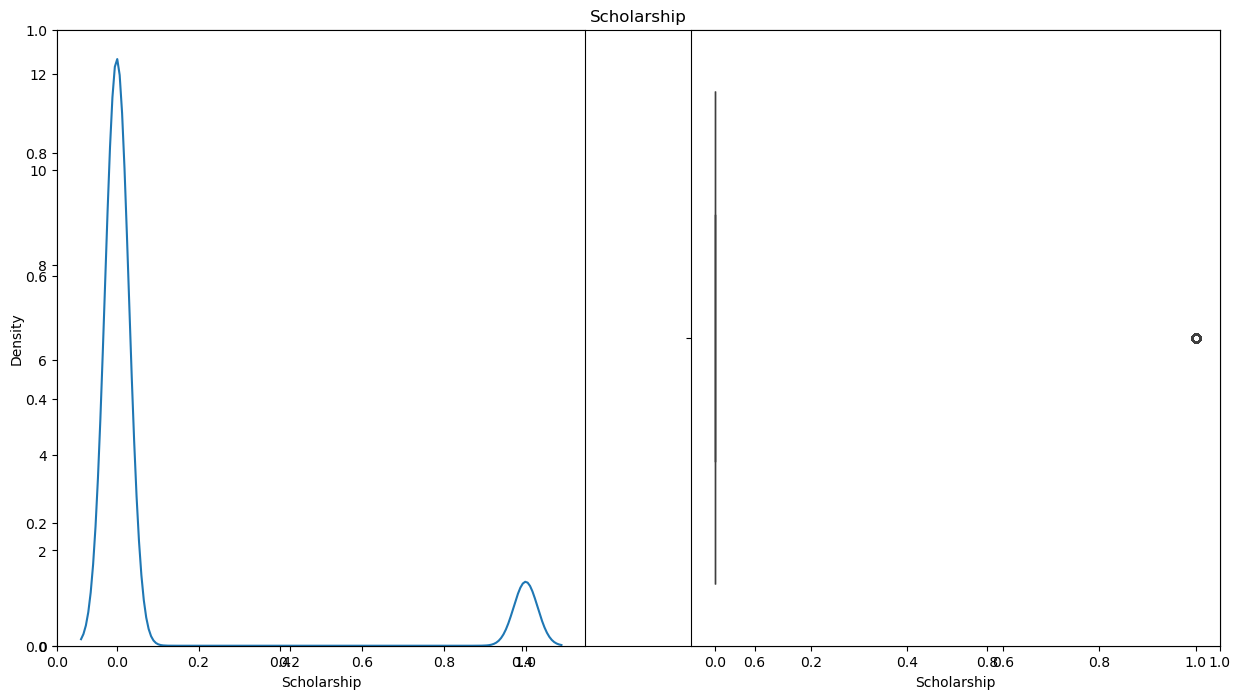

Skewness: 2.6991989199965536
Kurtosis: 5.285770456065958


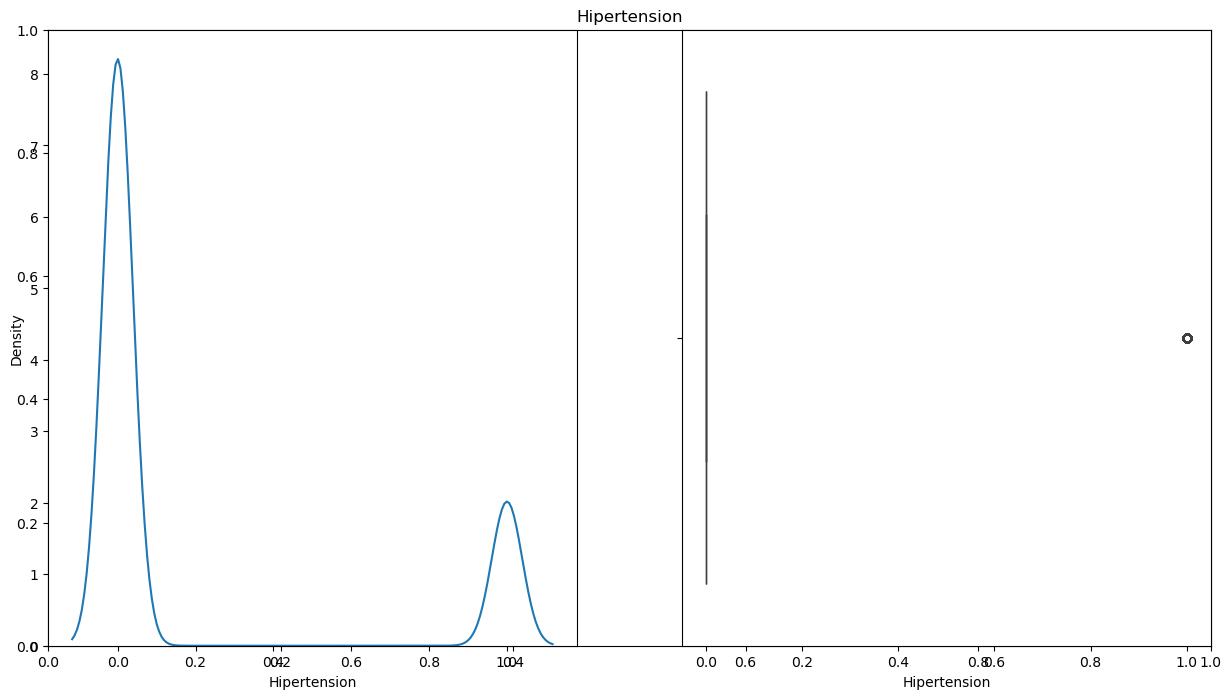

Skewness: 1.5217055164376079
Kurtosis: 0.315593389131378


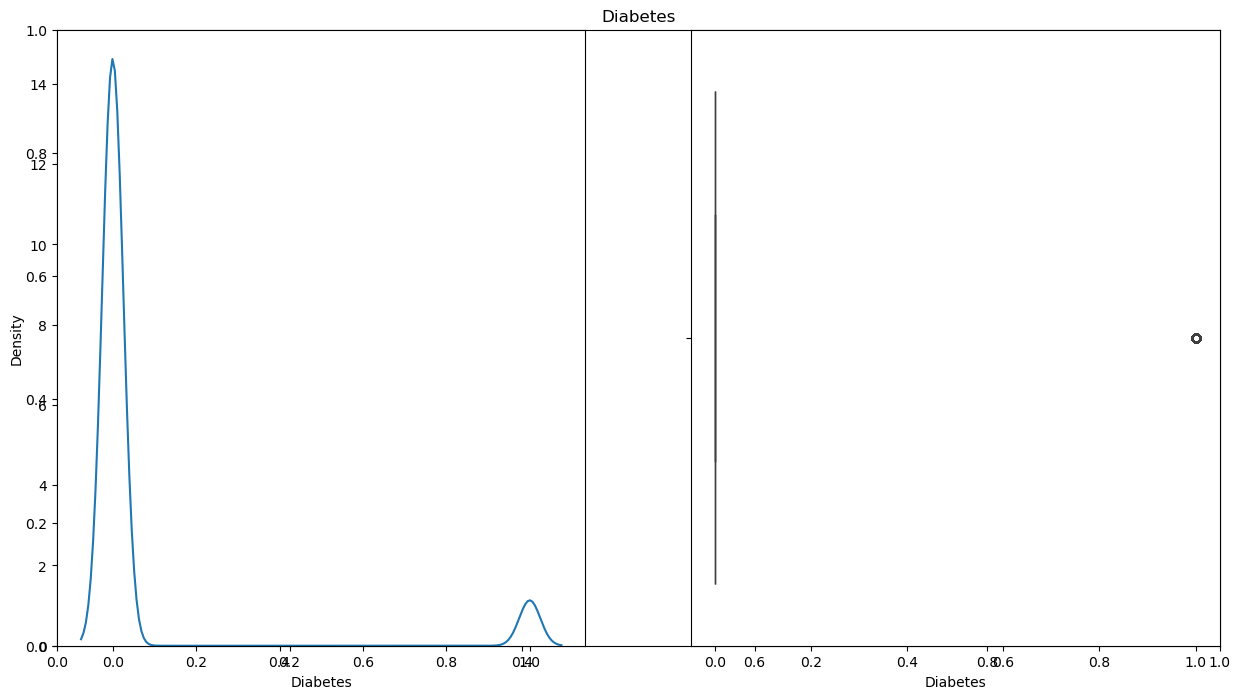

Skewness: 3.315531196442698
Kurtosis: 8.992909842094743


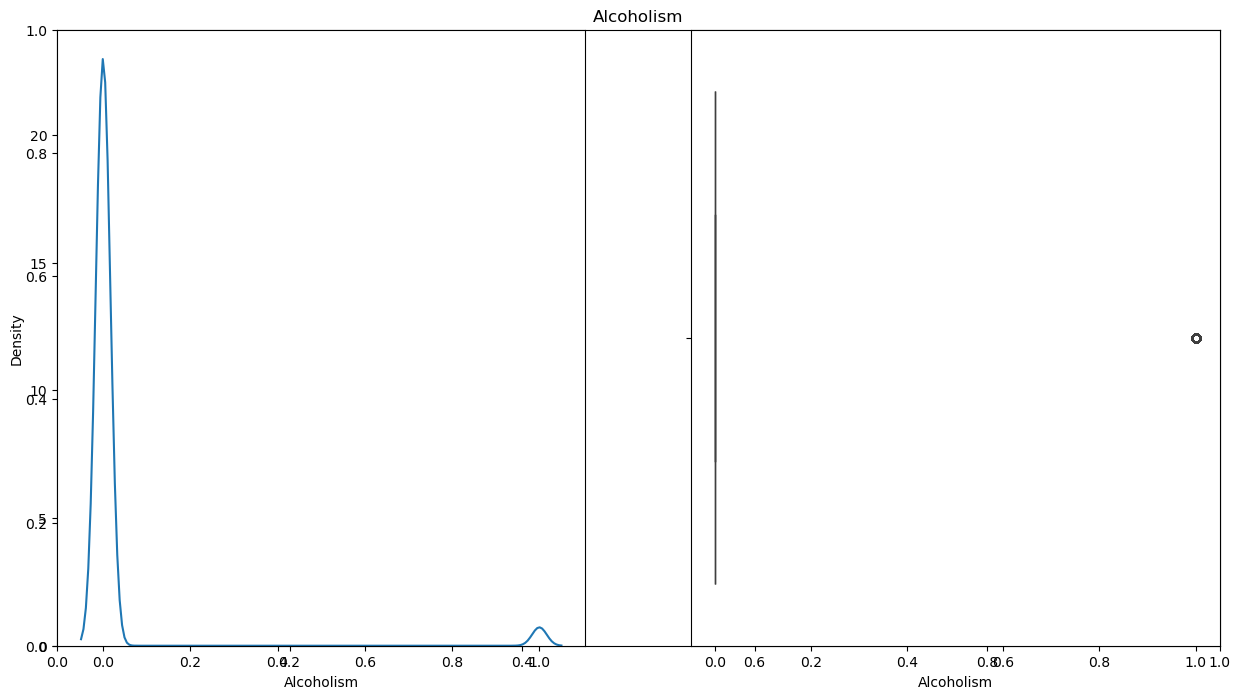

Skewness: 5.470567220225502
Kurtosis: 27.927611064321678


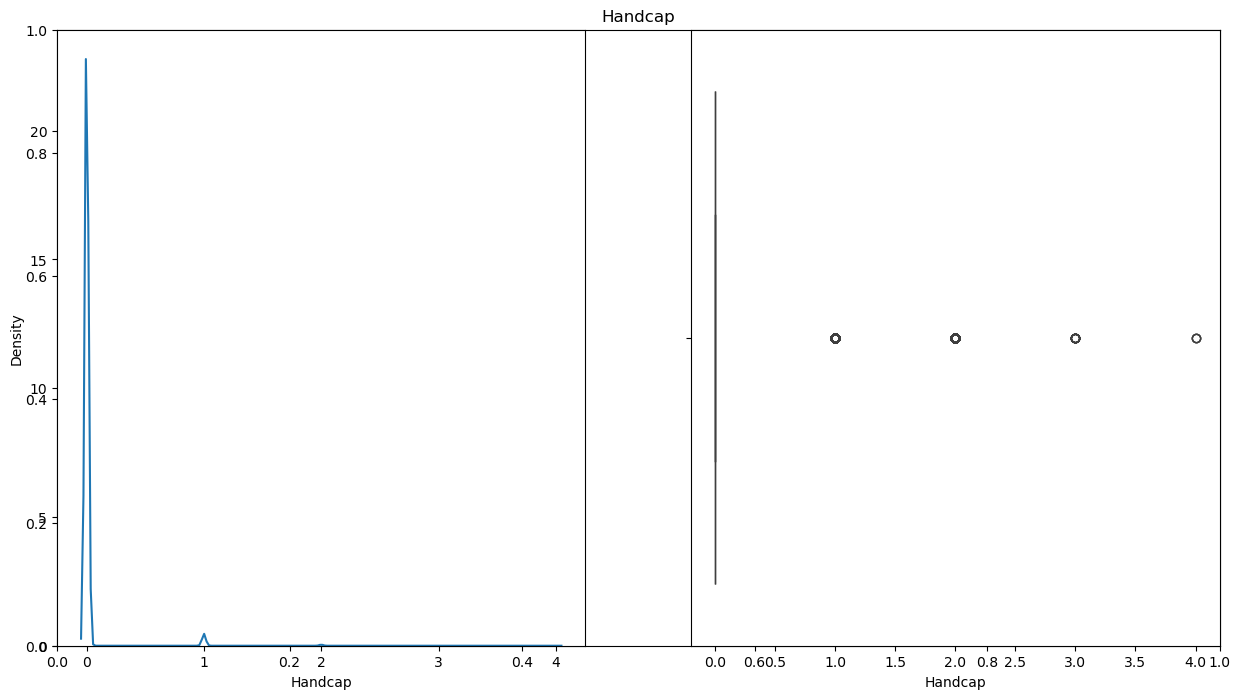

Skewness: 8.274398600761113
Kurtosis: 82.55571691298272


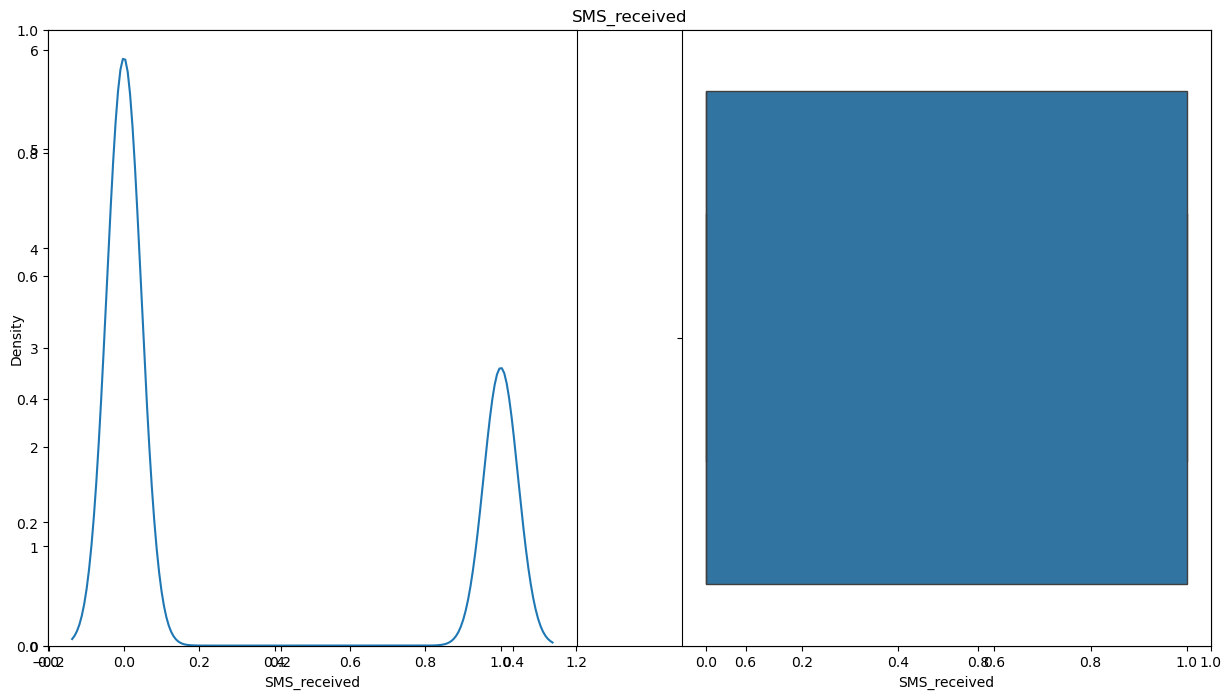

Skewness: 0.7667083327991944
Kurtosis: -1.4121838863891898


In [10]:
for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=[15,8])
    plt.title(i)
    plt.subplot(1,2,1)
    sns.kdeplot(x=df[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()
    print('Skewness:',df[i].skew())
    print('Kurtosis:',df[i].kurt())

## # pairplot for numarical data

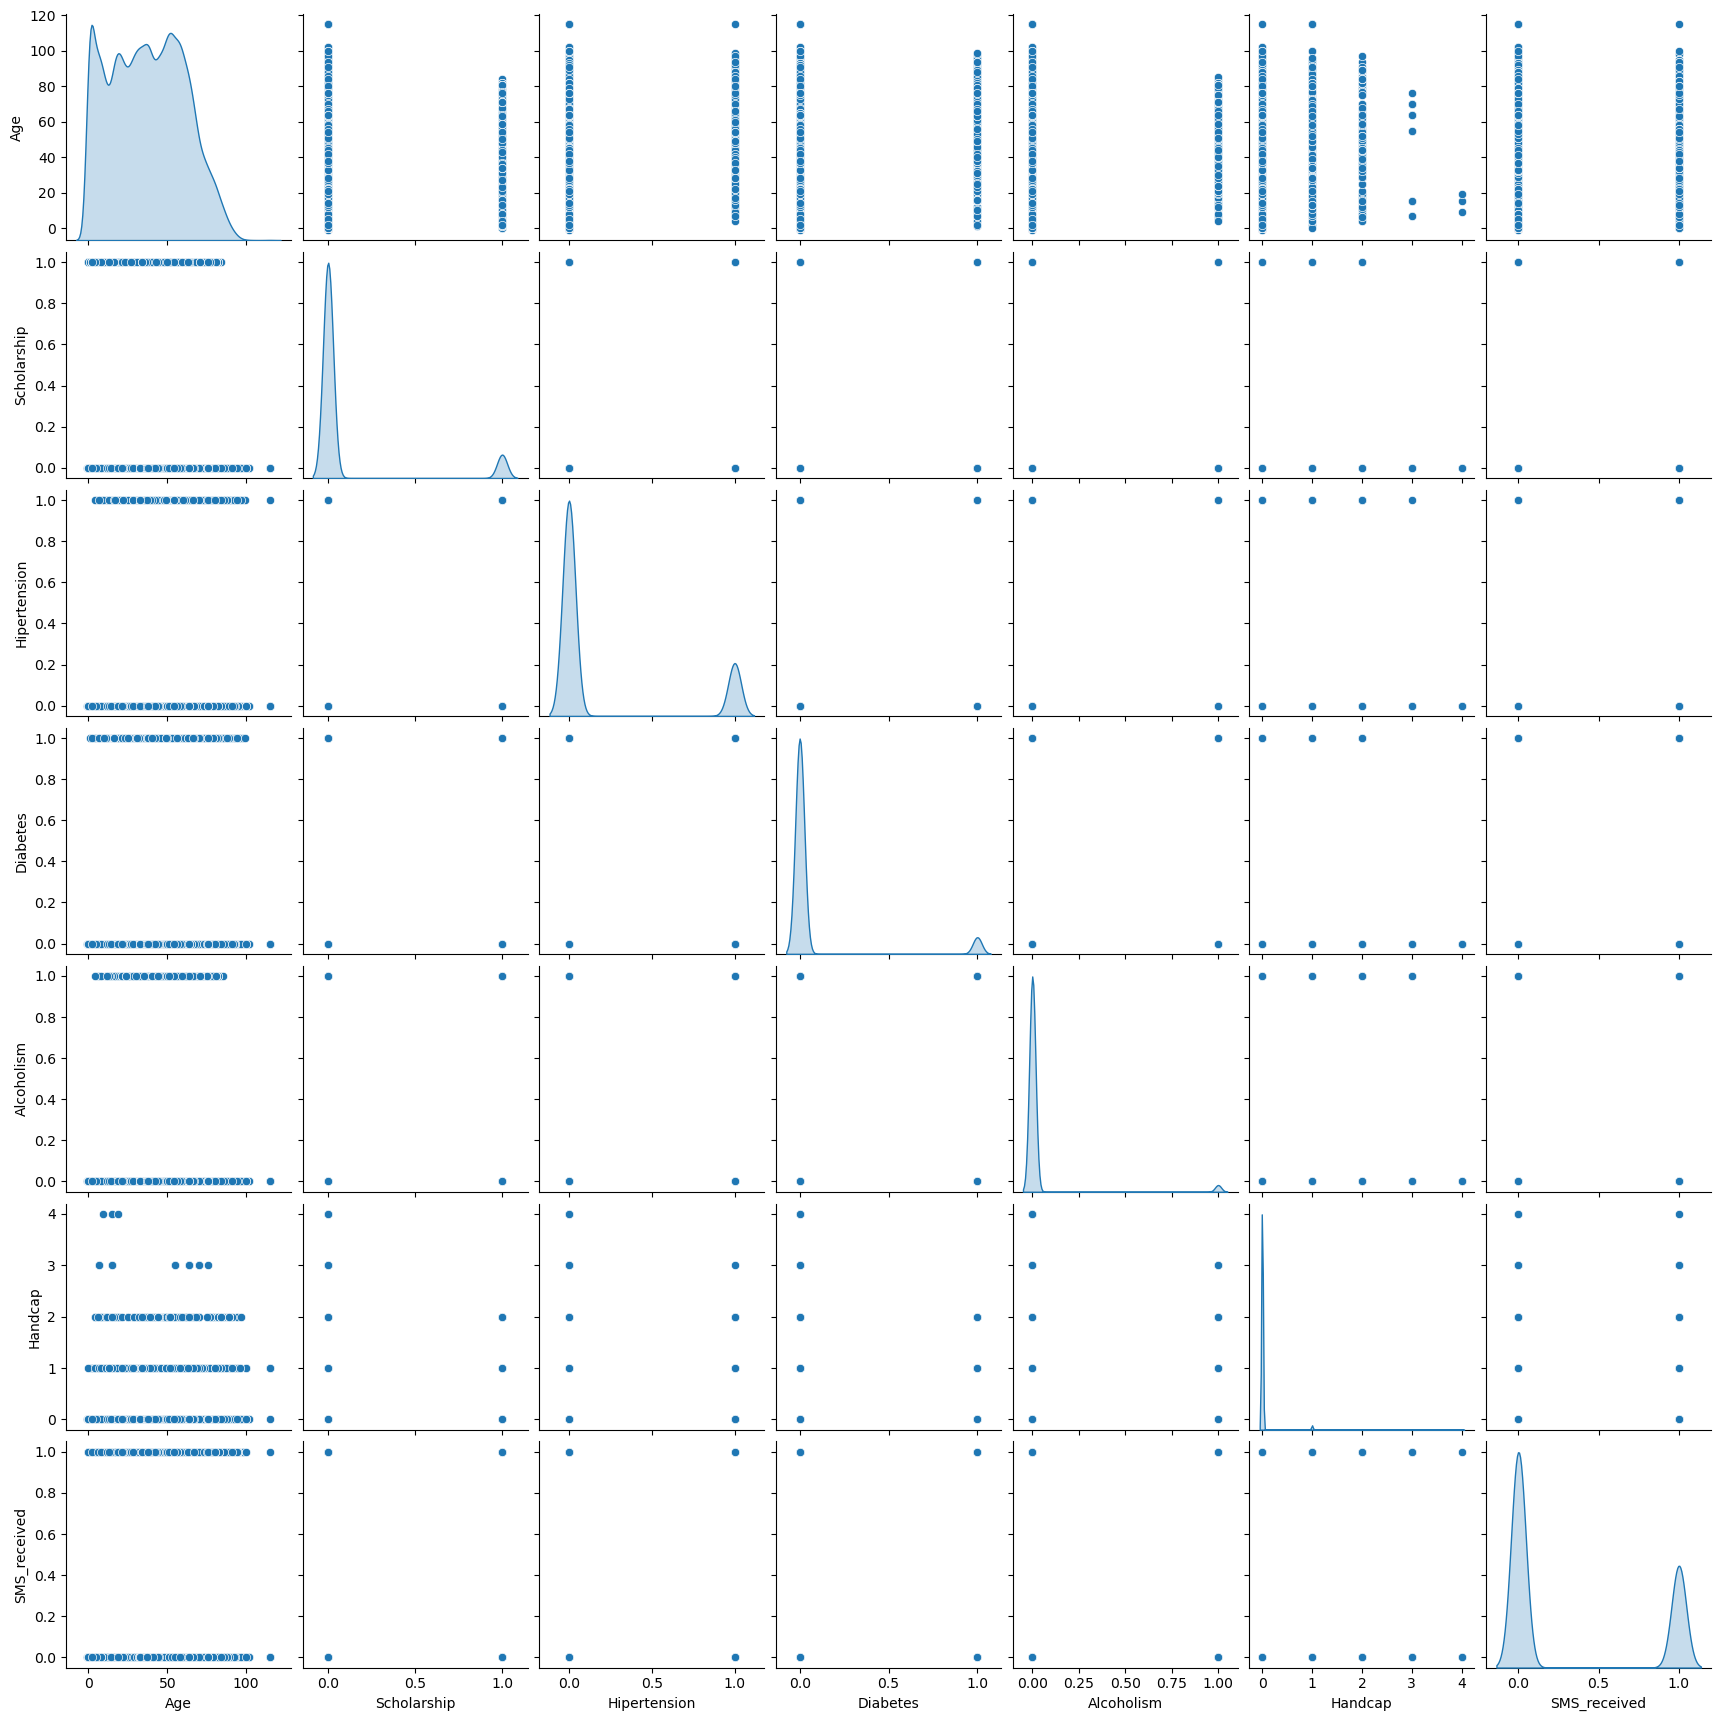

In [11]:
sns.pairplot(df.select_dtypes(include=np.number),diag_kind='kde')
plt.show()

* the data is non-linear and classifide between two or more groups.

## # heat map for cheaking correlation

In [12]:
# we have to replace the target variable in 0 and i format (yes=1, no=0) for cheaking correlation between other column.
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

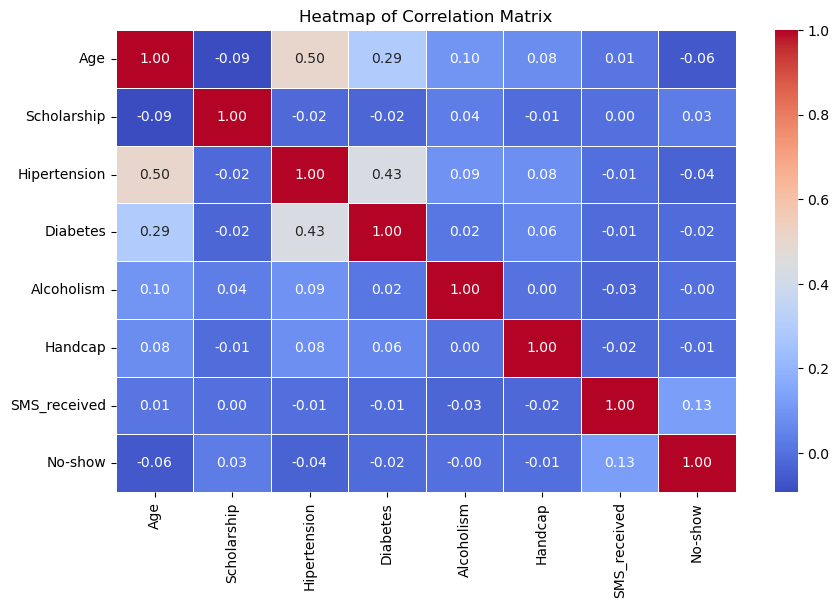

In [13]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

* Age vs Hypertension = 0.50
  There's a moderate positive correlation. As age increases, hypertension tends to increase.

* Age vs Scholarship = -0.09
  A very weak negative correlation. Almost no relationship.

* Diabetes vs Hypertension = 0.43
  Moderate positive correlation. People with hypertension may also have diabetes.

* SMS_received correlations are close to 0
  Receiving SMS messages has no strong correlation with other health-related features.

## # Summerize the numerical data

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,110527.0,37.088874,23.110205,-1.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,0.098266,0.297675,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,0.197246,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,0.071865,0.258265,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,0.030400,0.171686,0.0,0.0,0.0,0.0,1.0
Handcap,110527.0,0.022248,0.161543,0.0,0.0,0.0,0.0,4.0
SMS_received,110527.0,0.321026,0.466873,0.0,0.0,0.0,1.0,1.0
No-show,110527.0,0.201933,0.401444,0.0,0.0,0.0,0.0,1.0


In [15]:
desc = df.describe()

# Round all numeric values to 2 decimal places
desc_rounded = desc.round(2)

# OPTIONAL: Format specific columns (like proportions) as percentages
percentage_cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']

for col in percentage_cols:
    desc_rounded[col] = desc_rounded[col].apply(lambda x: f"{x * 100:.2f}%" if pd.api.types.is_number(x) else x)

# Display the formatted describe
print(desc_rounded)

             Age   Scholarship  Hipertension      Diabetes    Alcoholism  \
count  110527.00  11052700.00%  11052700.00%  11052700.00%  11052700.00%   
mean       37.09        10.00%        20.00%         7.00%         3.00%   
std        23.11        30.00%        40.00%        26.00%        17.00%   
min        -1.00         0.00%         0.00%         0.00%         0.00%   
25%        18.00         0.00%         0.00%         0.00%         0.00%   
50%        37.00         0.00%         0.00%         0.00%         0.00%   
75%        55.00         0.00%         0.00%         0.00%         0.00%   
max       115.00       100.00%       100.00%       100.00%       100.00%   

         Handcap  SMS_received   No-show  
count  110527.00  11052700.00%  110527.0  
mean        0.02        32.00%       0.2  
std         0.16        47.00%       0.4  
min         0.00         0.00%       0.0  
25%         0.00         0.00%       0.0  
50%         0.00         0.00%       0.0  
75%         0.

In [16]:
np.set_printoptions(suppress = True)

#### Summerize the categorical data

In [17]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717


### # in this data set we fond the mistake in datatypes and spellings of the columns name we need to change them

In [18]:
# changing datatypes
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 10.1+ MB


In [20]:
#### we have to cottect the columns name
df = df.rename(columns = {'Gender':'gender','ScheduledDay':'scheduled_day',
                          'AppointmentDay':'appointment_day','Age':'age','Neighbourhood':'neighborhood','Scholarship':'scholarship',
                          'Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handicap',
                          'SMS_received':'sms_received',
                          'No-show':'no_show'})

In [21]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighborhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

In [22]:
# cheaking the values counyts from each and every catagorical columns
for i in df.select_dtypes('O'):
    print(df[i].value_counts())
    print('----------------------')

gender
F    71840
M    38687
Name: count, dtype: int64
----------------------
neighborhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64
----------------------


In [23]:
# cheaking the values counyts from each and every numarical columns
for i in df.select_dtypes(np.number):
    print(df[i].value_counts())
    print('----------------------')

age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64
----------------------
scholarship
0    99666
1    10861
Name: count, dtype: int64
----------------------
hypertension
0    88726
1    21801
Name: count, dtype: int64
----------------------
diabetes
0    102584
1      7943
Name: count, dtype: int64
----------------------
alcoholism
0    107167
1      3360
Name: count, dtype: int64
----------------------
handicap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64
----------------------
sms_received
0    75045
1    35482
Name: count, dtype: int64
----------------------
no_show
0    88208
1    22319
Name: count, dtype: int64
----------------------
